Titanic Survive Prediction

In [254]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings("ignore")

In [255]:
# importing datasets
titanic_train = pd.read_csv('C:\\Users\\ruiro\\OneDrive\\Ambiente de Trabalho\\Code\\train_titanic.csv', sep =';')
titanic_test = pd.read_csv('C:\\Users\\ruiro\\OneDrive\\Ambiente de Trabalho\\Code\\test_titanic.csv', sep =';')

In [256]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [257]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [258]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [259]:
print(titanic_train.Survived.value_counts())
print(titanic_train.Pclass.value_counts())
print(titanic_train.Sex.value_counts())
print(titanic_train.SibSp.value_counts())
print(titanic_train.Parch.value_counts())
print(titanic_train.Embarked.value_counts())


Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [260]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [261]:
titanic_train.drop('Cabin', axis = 1, inplace = True)
titanic_train.Age.fillna(titanic_train.Age.mean(), inplace = True)
titanic_train.Embarked.fillna(titanic_train.Embarked.mode()[0], inplace = True)
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Encoding Labels

In [262]:
encoder = LabelEncoder()
titanic_train.Sex = encoder.fit_transform(titanic_train.Sex)
titanic_train.Embarked = encoder.fit_transform(titanic_train.Embarked)
print(titanic_train.Sex.value_counts())
titanic_train.Embarked.value_counts()
# put age in group ages

bins = [0, 18, 35, 65, 100]
titanic_train.Age = pd.cut(titanic_train.Age, bins= bins, labels=[1,2,3,4])
print(titanic_train.Age.value_counts())


Sex
1    577
0    314
Name: count, dtype: int64
Age
2    535
3    209
1    139
4      8
Name: count, dtype: int64


Categorizing the columns

In [263]:
titanic_train.Sex = titanic_train.Age.astype('category')
titanic_train.Embarked = titanic_train.Embarked.astype('category')
titanic_train.Pclass = titanic_train.Pclass.astype('category')
titanic_train.Age = titanic_train.Age.astype('category')

Dropping Irrelevant columns

In [264]:
titanic_train.drop(['Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

Correlation between columns

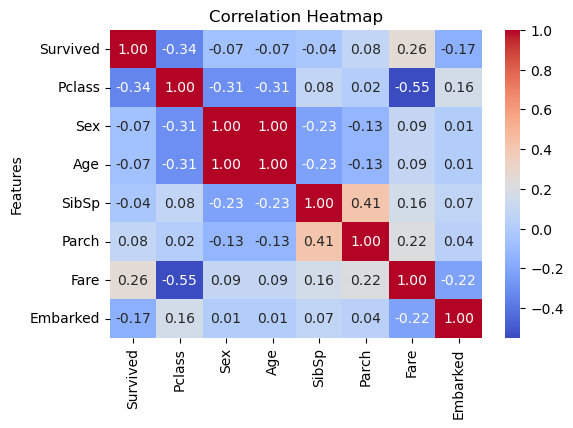

In [265]:
correlation_matrix = titanic_train.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Customize the plot
plt.title('Correlation Heatmap')
plt.ylabel('Features')
plt.show()

In [266]:
y = titanic_train.iloc[:,1]
x = titanic_train.drop('Survived', axis = 1)

In [267]:
y.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: category
Categories (3, int64): [1, 2, 3]

In [268]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,2,1,0,7.2500,2
1,1,3,3,1,0,71.2833,0
2,3,2,2,0,0,7.9250,2
3,1,2,2,1,0,53.1000,2
4,3,2,2,0,0,8.0500,2
